<a href="https://colab.research.google.com/github/SampreethAvvari/datasciencebootcamp/blob/main/Week7_Logistic_Regression_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week7 - Logistic Regression and Clustering
### Data Science Bootcamp Fall 23

Author - Kartik Jindgar
Practice Questions completed by Sampreeth Avvari
---





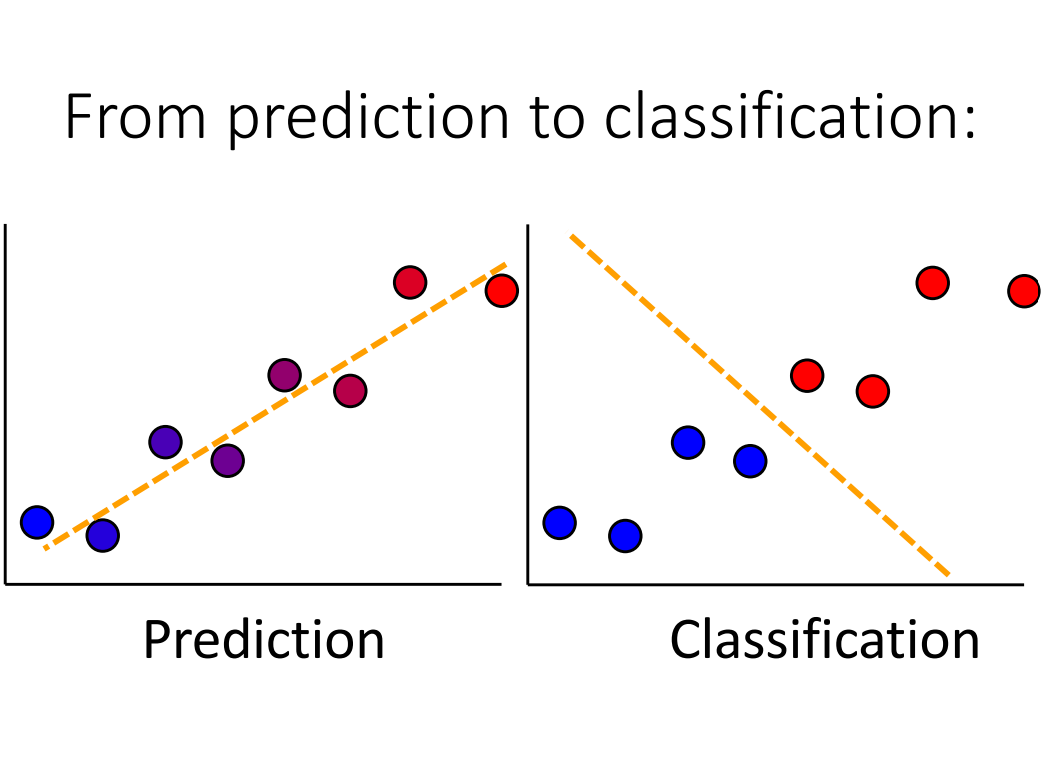

## Recap


Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `x` predictor.


```
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.intercept_, linear_reg.coef_)
```




**Coefficient interpretation:** A 1-unit increase in `x` is associated with a `β`-unit change in `y`.

**Intercept interpretation:** When `x = 0`, the estimated value of `y` is $\beta_0$


<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, `but what about when we want to predict membership in a class or category?`

## Toy Example

` You want to predict if a candidate will get hired by a company or not `

Things you might consider when making this decision -
1. `GPA`
2. `Experience`
3. `Portfolio`
4. `Skills`
5. `Education` ...



## Lets plot GPA against Hired?

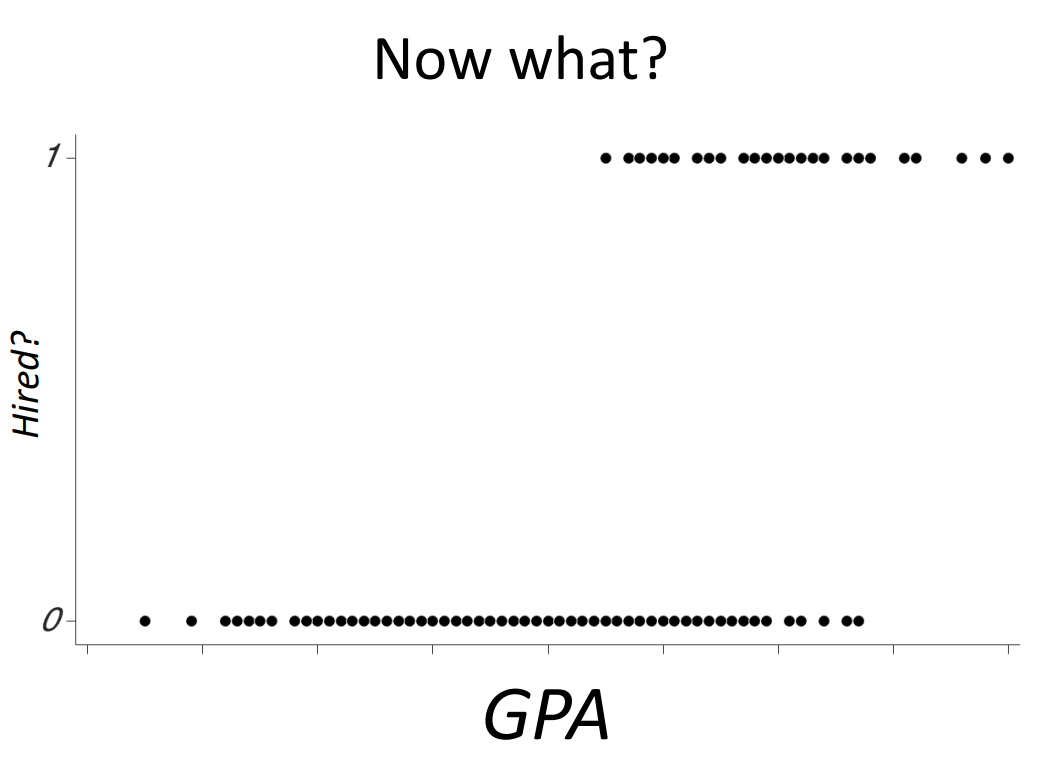

## Can we apply a Linear Regression model?

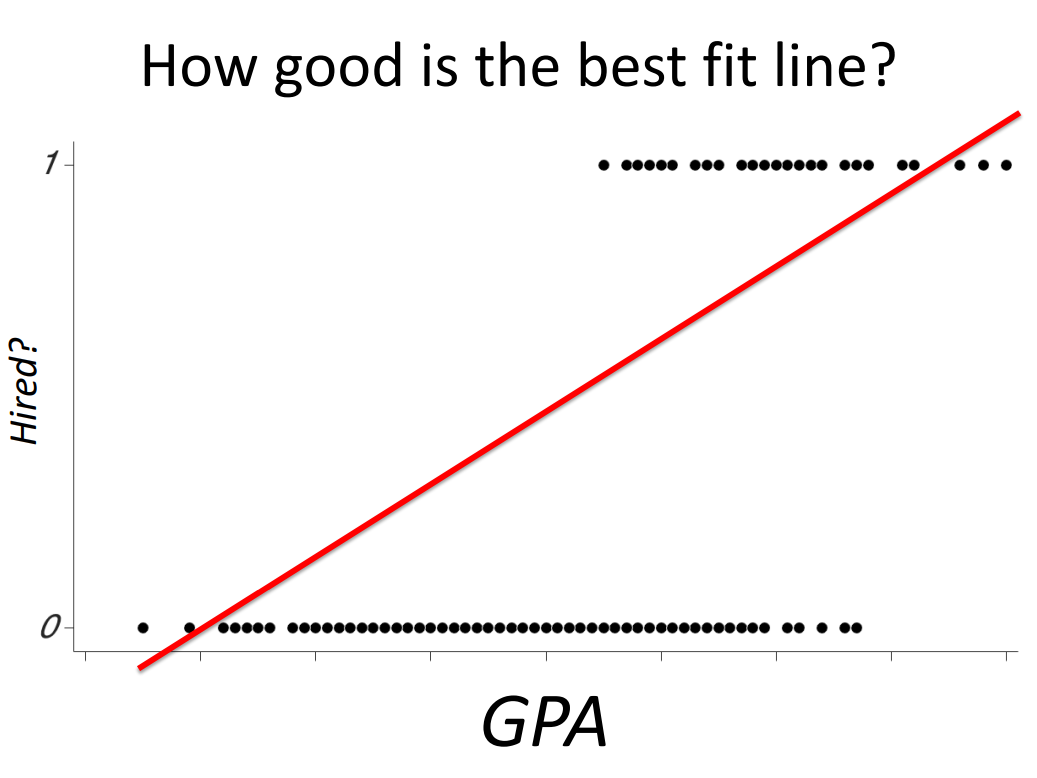

# `Just because we can, doesn't mean we should!`

Issues with Linear Regression in this case -
1. It assumes that the data is distributed normally. Here, the outcomes are either `0 or 1 (binary)`. Definitely, not normal!

2. Effect of unit change is assumed to be constant

3. Linear Regressions is unbounded


Hence, we need something else in this case.




---

## Logistic Regression

* A `nonlinear model` that links the predictor and the outcomes
* We model the `odds` of an outcome happening



> odds = $\frac{p}{1-p}$

eg. if p = 0.5  -> odds = 1:1

eg. if p = 0.75 -> odds = 3:1


## How does Logistic Regression work?

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the `logit function`.

Probability is sometimes written as π.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1



`We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?`


- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

## Lets fit a Logistic Regression model

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [32]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [33]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [34]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

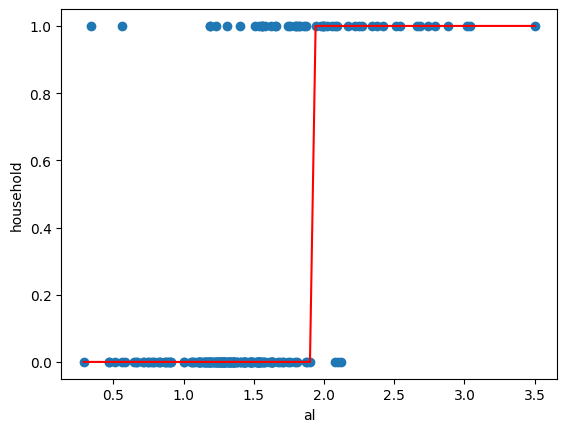

In [36]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [37]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [38]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [39]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

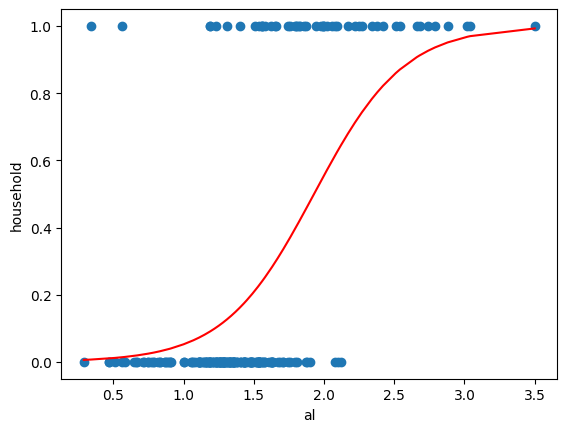

In [40]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Interpreting the coeffecients

**Interpretation:** A 1-unit increase in `al` is associated with a 2.01-unit increase in the log odds of `household`.

Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

## How good are our predictions?

In [41]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [42]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [43]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [44]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [46]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [47]:
recall_score(y,pred)

0.5098039215686274

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.
- **ROC curves and area under a curve (AUC)**
  - Good for ranking and prioritization problems.
  - Allows you to visualize the performance of your classifier across all possible classification thresholds, thus helping you to choose a threshold that appropriately balances sensitivity and specificity.
  - Still useful when there is high class imbalance (unlike classification accuracy/error).
  - Harder to use when there are more than two response classes.
- **Log loss**
  - Most useful when well-calibrated predicted probabilities are important to your business objective.
    - Expected value calculations
    - Triage

The good news is that these are readily available in Python and R, and are usually easy to calculate once you know about them.

Practice Questions:
1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model

In [48]:
# Try different thresholds
thresholds = [0.2, 0.3, 0.7, 0.8]

for threshold in thresholds:
    custom_pred = (logreg.predict_proba(X)[:, 1] > threshold).astype(int)
    cm = metrics.confusion_matrix(y_true=y, y_pred=custom_pred)

    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision = cm[1, 1] / np.sum(cm[:, 1])
    recall = cm[1, 1] / np.sum(cm[1, :])

    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n")

Threshold: 0.2
Accuracy: 0.7710, Precision: 0.5116, Recall: 0.8627

Threshold: 0.3
Accuracy: 0.8645, Precision: 0.7200, Recall: 0.7059

Threshold: 0.7
Accuracy: 0.8364, Precision: 1.0000, Recall: 0.3137

Threshold: 0.8
Accuracy: 0.8178, Precision: 1.0000, Recall: 0.2353



In [49]:
#Q2

# Using 'Ca' column
X_ca = np.array(glass.Ca).reshape(-1, 1)

logreg.fit(X_ca, y)
pred_ca = logreg.predict(X_ca)

# Perform the analysis as before
for threshold in thresholds:
    custom_pred_ca = (logreg.predict_proba(X_ca)[:, 1] > threshold).astype(int)
    cm_ca = metrics.confusion_matrix(y_true=y, y_pred=custom_pred_ca)

    accuracy_ca = (cm_ca[0, 0] + cm_ca[1, 1]) / np.sum(cm_ca)
    precision_ca = cm_ca[1, 1] / np.sum(cm_ca[:, 1])
    recall_ca = cm_ca[1, 1] / np.sum(cm_ca[1, :])

    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy_ca:.4f}, Precision: {precision_ca:.4f}, Recall: {recall_ca:.4f}\n")


Threshold: 0.2
Accuracy: 0.2383, Precision: 0.2383, Recall: 1.0000

Threshold: 0.3
Accuracy: 0.7617, Precision: nan, Recall: 0.0000

Threshold: 0.7
Accuracy: 0.7617, Precision: nan, Recall: 0.0000

Threshold: 0.8
Accuracy: 0.7617, Precision: nan, Recall: 0.0000



<ipython-input-49-29dfb376ecbb>:15: RuntimeWarning: invalid value encountered in long_scalars
  precision_ca = cm_ca[1, 1] / np.sum(cm_ca[:, 1])
<ipython-input-49-29dfb376ecbb>:15: RuntimeWarning: invalid value encountered in long_scalars
  precision_ca = cm_ca[1, 1] / np.sum(cm_ca[:, 1])
<ipython-input-49-29dfb376ecbb>:15: RuntimeWarning: invalid value encountered in long_scalars
  precision_ca = cm_ca[1, 1] / np.sum(cm_ca[:, 1])


In [50]:
#Q3

X_all = glass.drop(['Type', 'household', 'household_pred_prob'], axis=1)
y_all = glass['household']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Logistic Regression on all features
logreg_all = LogisticRegression()
logreg_all.fit(X_all_scaled, y_all)

# Predictions
pred_all = logreg_all.predict(X_all_scaled)

# Evaluate performance
accuracy_all = accuracy_score(y_true=y_all, y_pred=pred_all)
precision_all = precision_score(y_true=y_all, y_pred=pred_all)
recall_all = recall_score(y_all, pred_all)

print(f"Accuracy: {accuracy_all:.4f}, Precision: {precision_all:.4f}, Recall: {recall_all:.4f}")


Accuracy: 0.9439, Precision: 0.8980, Recall: 0.8627


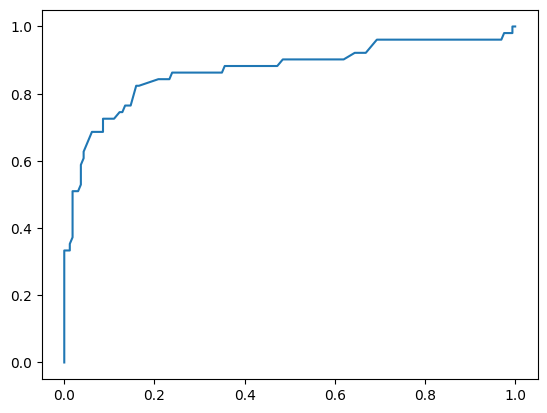

In [51]:
#Q4

# Plot ROC curve for the initial model
fpr, tpr, thresholds = metrics.roc_curve(y, logreg.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, label='Al Column')


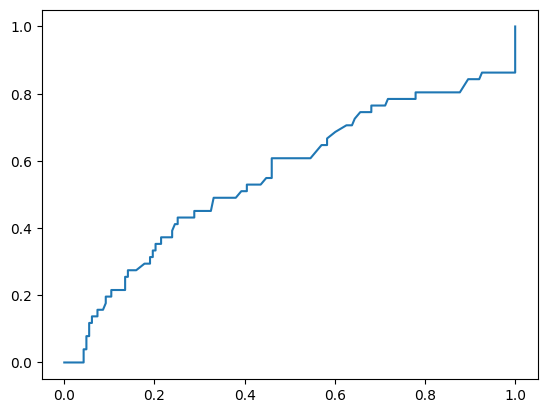

In [52]:
# Plot ROC curve for the 'Na' column
fpr_ca, tpr_ca, thresholds_ca = metrics.roc_curve(y, logreg.predict_proba(X_ca)[:, 1])
plt.plot(fpr_ca, tpr_ca, label='Ca Column')


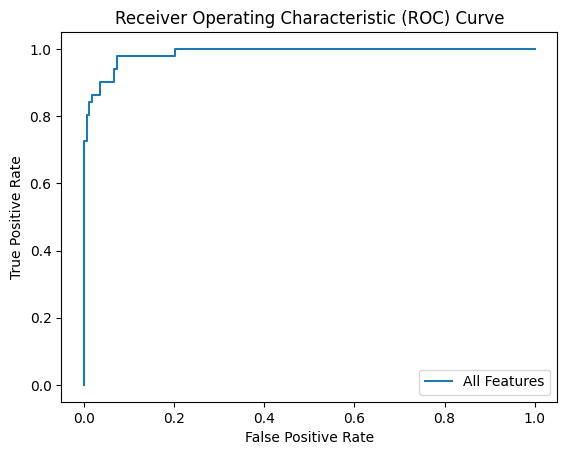

In [53]:
# Plot ROC curve for the model with all features
fpr_all, tpr_all, thresholds_all = metrics.roc_curve(y_all, logreg_all.predict_proba(X_all_scaled)[:, 1])
plt.plot(fpr_all, tpr_all, label='All Features')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

---
---

# Clustering

---
---

### Helpful uses for clustering:
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

## K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3-4 until your centroids converge.

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- ranges from 0 to very high values
- low inertia = dense clusters

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


### Inertia

sum of squared errors for each cluster

- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


### Silhouette Score

measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

* <https://en.wikipedia.org/wiki/Silhouette_(clustering)>


### Demo

In [54]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [55]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


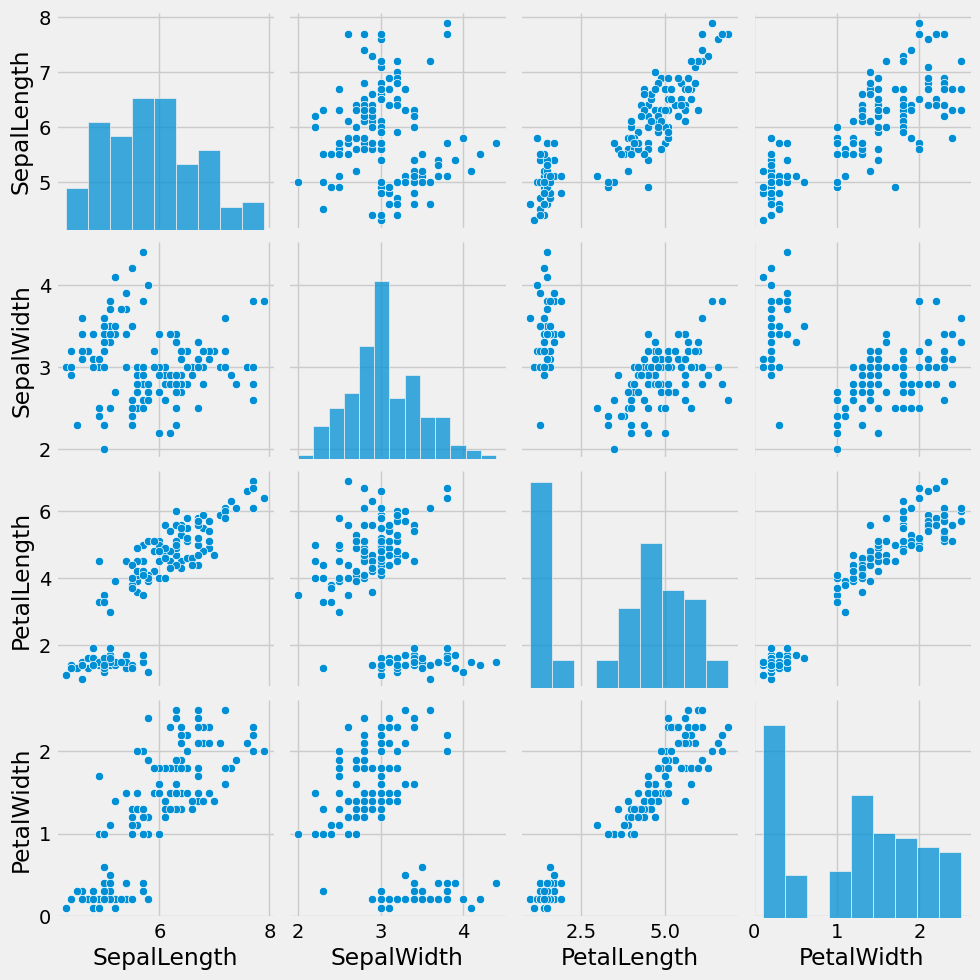

In [56]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [106]:
cols

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [57]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [58]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [59]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [60]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [61]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [62]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this.

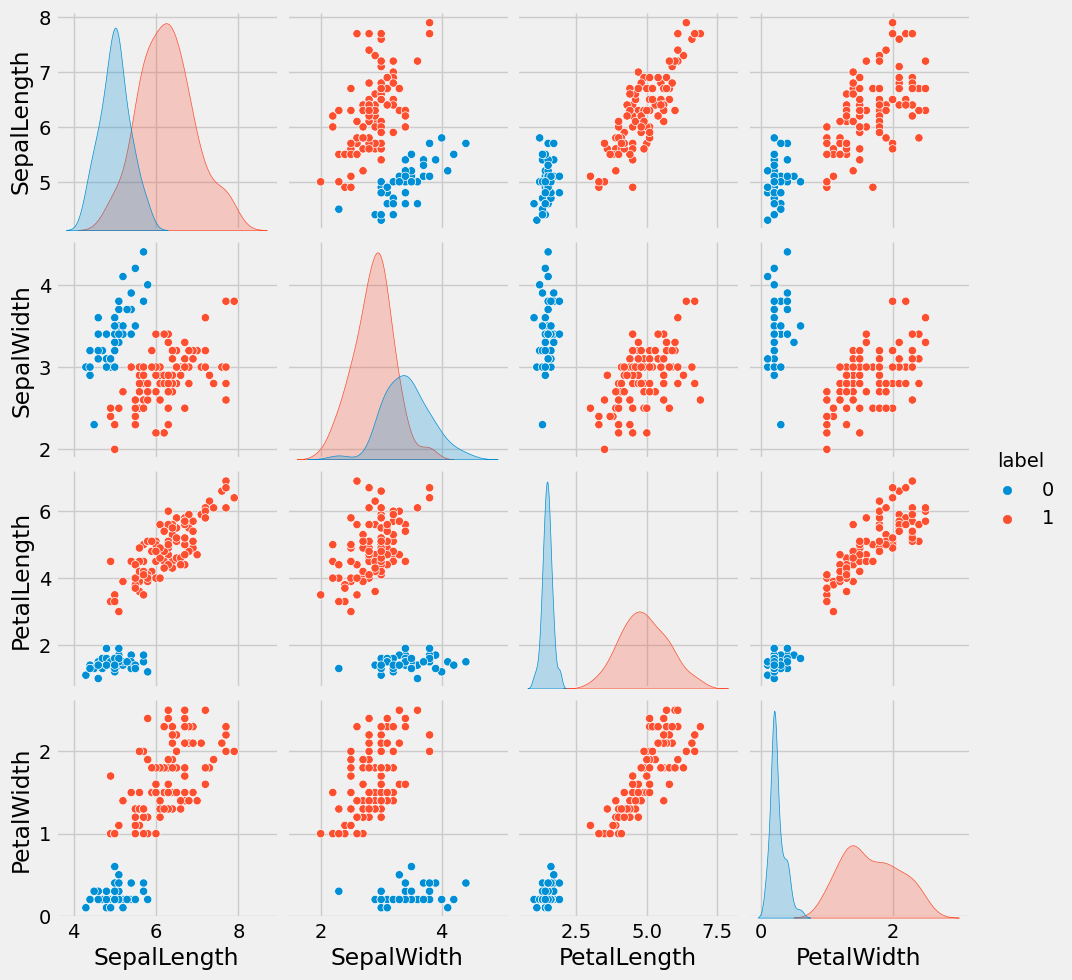

In [63]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

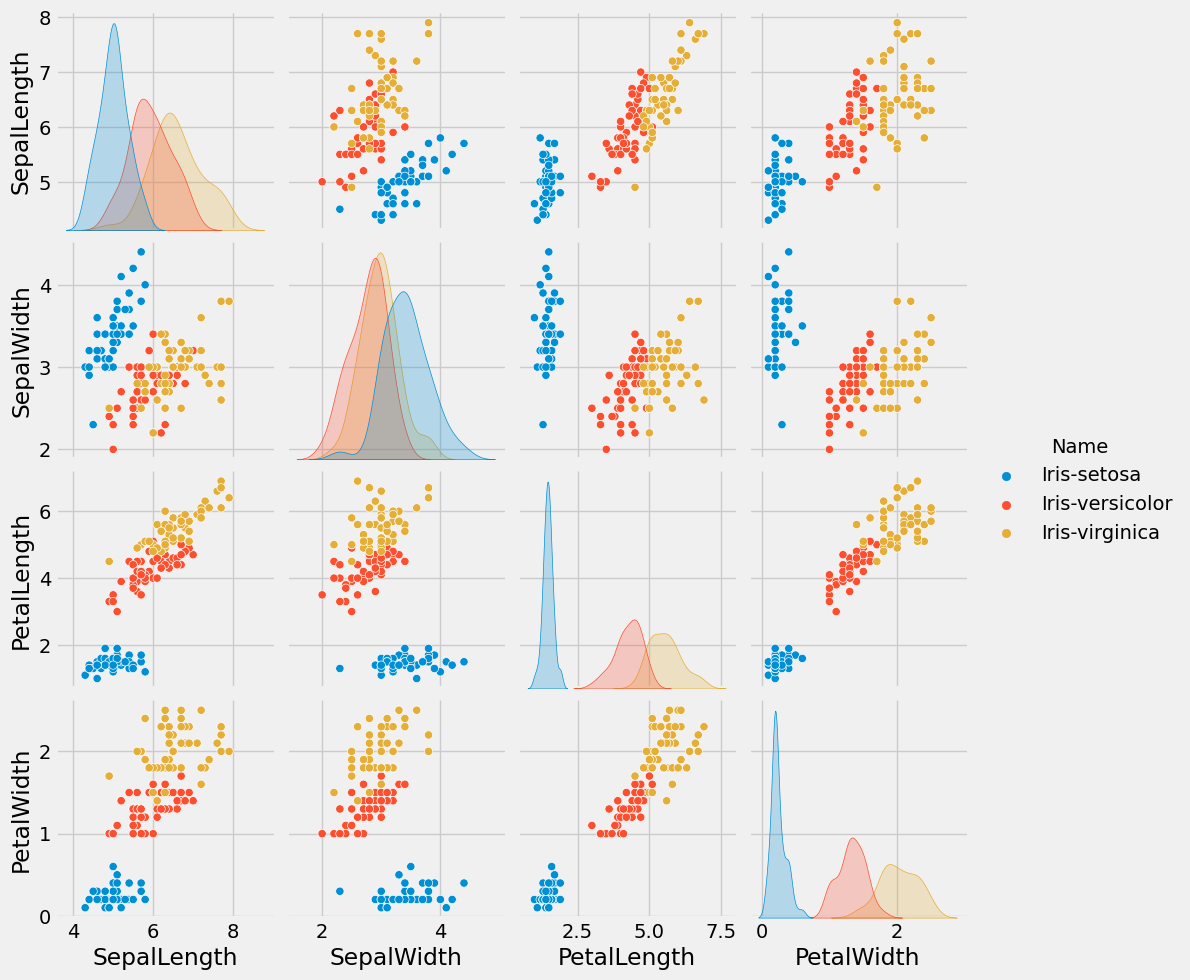

In [64]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

### Practice questions:
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset


In [65]:
#Q1

# Try different values of k
k_values = [2, 3, 4, 5]

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    inertia = kmeans.inertia_
    silhouette_score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')

    print(f"For k={k}, Inertia: {inertia:.4f}, Silhouette Score: {silhouette_score:.4f}")


For k=2, Inertia: 12.1437, Silhouette Score: 0.6295
For k=3, Inertia: 6.9981, Silhouette Score: 0.5043
For k=4, Inertia: 5.5328, Silhouette Score: 0.4446
For k=5, Inertia: 4.5712, Silhouette Score: 0.3519


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Increasing k is expected to decrease inertia as it brings data points closer to the centroids of their respective clusters. A higher silhouette score, indicating better-defined clusters, results from assessing how similar an object is to its own cluster compared to other clusters. Both metrics serve as valuable tools for evaluating the performance of the clustering algorithm.

In [66]:
# Without scaling features
kmeans_no_scaling = cluster.KMeans(n_clusters=3)
kmeans_no_scaling.fit(df[cols])

labels_no_scaling = kmeans_no_scaling.labels_
inertia_no_scaling = kmeans_no_scaling.inertia_
silhouette_score_no_scaling = metrics.silhouette_score(df[cols], labels_no_scaling, metric='euclidean')

print(f"Inertia without scaling: {inertia_no_scaling:.4f}, Silhouette Score without scaling: {silhouette_score_no_scaling:.4f}")


Inertia without scaling: 78.9408, Silhouette Score without scaling: 0.5526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering algorithms often require the scaling of features to ensure equal contribution to distance calculations, preventing any single feature from dominating the clustering process.

In [97]:
# Q2

df_nutrients = pd.read_csv("/content/nutrients.txt", delimiter='\s+')

In [98]:
df_nutrients.head(5)


,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [99]:
df_nutrients

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


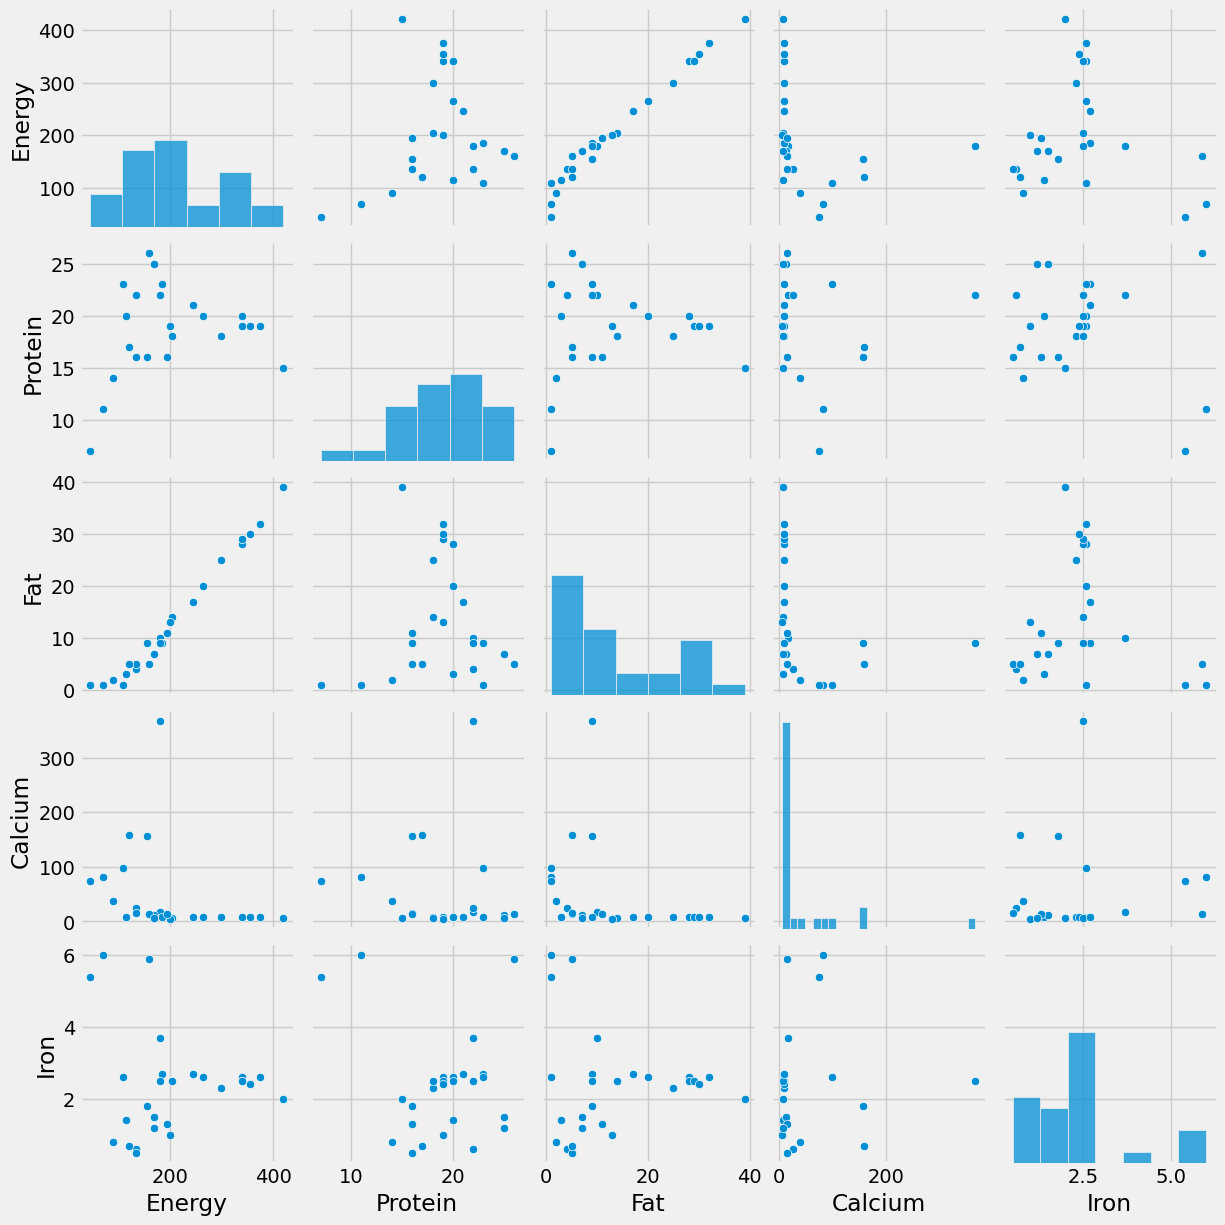

In [102]:
cols_nutrients = df_nutrients.columns[1:]
sns.pairplot(df_nutrients[cols_nutrients])

X_scaled_nutrients = preprocessing.MinMaxScaler().fit_transform(df_nutrients[cols_nutrients])


In [103]:
cols_nutrients

Index(['Energy', 'Protein', 'Fat', 'Calcium', 'Iron'], dtype='object')

In [105]:
X_scaled_nutrients

array([[0.78666667, 0.68421053, 0.71052632, 0.01104972, 0.38181818],
       [0.53333333, 0.73684211, 0.42105263, 0.01104972, 0.4       ],
       [1.        , 0.42105263, 1.        , 0.00552486, 0.27272727],
       [0.88      , 0.63157895, 0.81578947, 0.01104972, 0.38181818],
       [0.36      , 0.78947368, 0.23684211, 0.03314917, 0.58181818],
       [0.18666667, 0.68421053, 0.05263158, 0.00828729, 0.16363636],
       [0.33333333, 0.94736842, 0.15789474, 0.01933702, 0.18181818],
       [0.30666667, 1.        , 0.10526316, 0.02486188, 0.98181818],
       [0.58666667, 0.68421053, 0.5       , 0.01104972, 0.38181818],
       [0.68      , 0.57894737, 0.63157895, 0.01104972, 0.32727273],
       [0.78666667, 0.68421053, 0.71052632, 0.01104972, 0.36363636],
       [0.78666667, 0.63157895, 0.73684211, 0.01104972, 0.36363636],
       [0.82666667, 0.63157895, 0.76315789, 0.01104972, 0.34545455],
       [0.42666667, 0.57894737, 0.34210526, 0.00552486, 0.36363636],
       [0.37333333, 0.84210526, 0.

In [107]:
# Check the scaled data
pd.DataFrame(X_scaled_nutrients, columns=cols_nutrients).describe()

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.328460,0.107632,0.342088
std,0.269887,0.223773,0.296238,0.215564,0.265692
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.105263,0.011050,0.154545
50%,0.360000,0.631579,0.210526,0.011050,0.363636
75%,0.633333,0.789474,0.565789,0.073204,0.381818
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
# Try different values of k
k_values_nutrients = [2, 3, 4, 5]

for k in k_values_nutrients:
    kmeans_nutrients = cluster.KMeans(n_clusters=k)
    kmeans_nutrients.fit(X_scaled_nutrients)

    labels_nutrients = kmeans_nutrients.labels_
    inertia_nutrients = kmeans_nutrients.inertia_
    silhouette_score_nutrients = metrics.silhouette_score(X_scaled_nutrients, labels_nutrients, metric='euclidean')

    print(f"For k={k}, Inertia: {inertia_nutrients:.4f}, Silhouette Score: {silhouette_score_nutrients:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, Inertia: 5.0693, Silhouette Score: 0.3785
For k=3, Inertia: 3.3666, Silhouette Score: 0.4331
For k=4, Inertia: 2.5633, Silhouette Score: 0.4315
For k=5, Inertia: 1.8310, Silhouette Score: 0.3799


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
# Without scaling features
kmeans_no_scaling_nutrients = cluster.KMeans(n_clusters=3)  # Assuming k=3
kmeans_no_scaling_nutrients.fit(df_nutrients[cols_nutrients])

labels_no_scaling_nutrients = kmeans_no_scaling_nutrients.labels_
inertia_no_scaling_nutrients = kmeans_no_scaling_nutrients.inertia_
silhouette_score_no_scaling_nutrients = metrics.silhouette_score(df_nutrients[cols_nutrients], labels_no_scaling_nutrients, metric='euclidean')

print(f"Inertia without scaling: {inertia_no_scaling_nutrients:.4f}, Silhouette Score without scaling: {silhouette_score_no_scaling_nutrients:.4f}")


Inertia without scaling: 102432.4149, Silhouette Score without scaling: 0.5583


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Further reading

- The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) is one popular alternative.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.

# Thank you!